In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


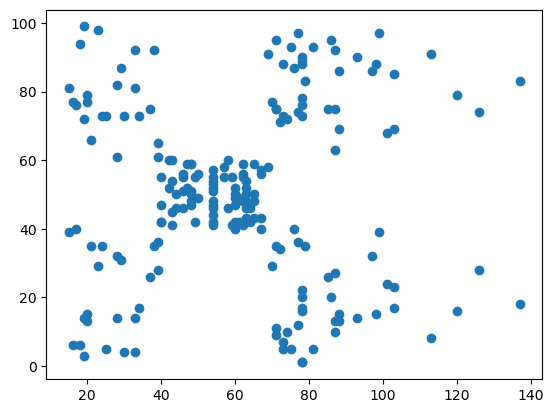

In [6]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

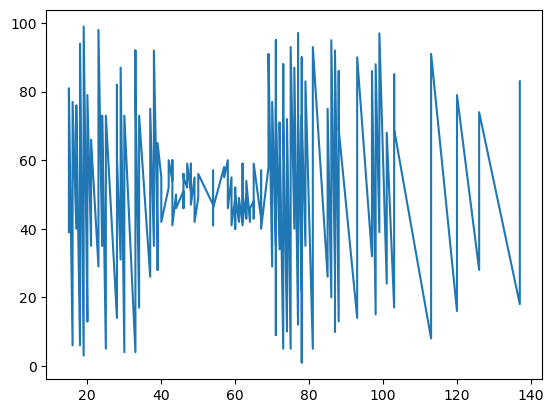

In [7]:
plt.plot(df['Annual Income (k$)'],df['Spending Score (1-100)'])

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

<function matplotlib.pyplot.show(close=None, block=None)>

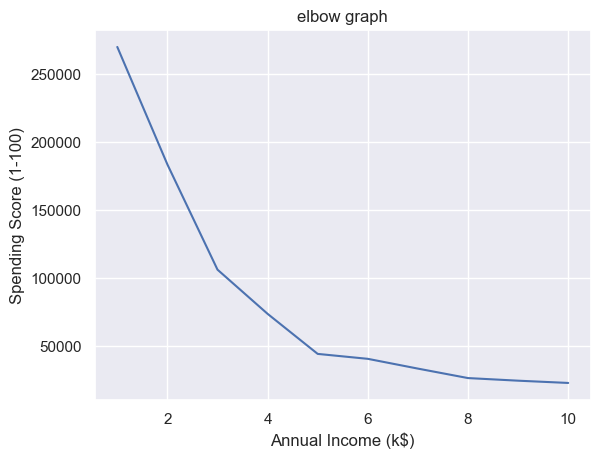

In [8]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

import seaborn as sns

wcss=[]

for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,random_state=42)
    Kmeans.fit(X)

    wcss.append(Kmeans.inertia_)

sns.set()
plt.plot(range(1,11),wcss)
plt.title("elbow graph")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show

In [9]:
from kneed import KneeLocator

# Assuming `wcss` is already calculated as before
# Find the optimal number of clusters
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print(kl.elbow)


5


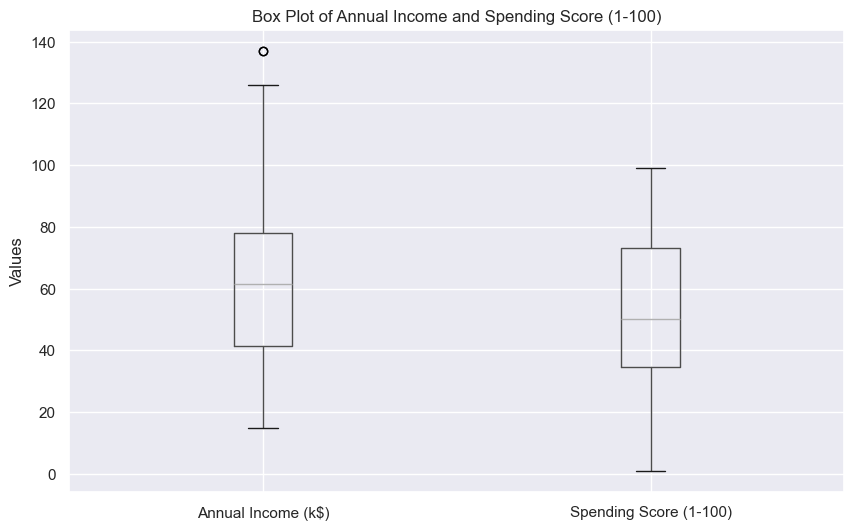

In [10]:
# Creating a box plot
plt.figure(figsize=(10, 6))
df.boxplot(column=['Annual Income (k$)', 'Spending Score (1-100)'])
plt.title('Box Plot of Annual Income and Spending Score (1-100)')
plt.ylabel('Values')
plt.show()

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
import pandas as pd



# Identify upper bound (e.g., 95th percentile)
upper_bound = df['Annual Income (k$)'].quantile(0.95)

# Replace values above upper bound with the upper bound
df['Annual Income (k$)'] = df['Annual Income (k$)'].apply(lambda x: min(x, upper_bound))

print(df)


     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                15.0                      39
1             2    Male   21                15.0                      81
2             3  Female   20                16.0                       6
3             4  Female   23                16.0                      77
4             5  Female   31                17.0                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35               103.0                      79
196         197  Female   45               103.0                      28
197         198    Male   32               103.0                      74
198         199    Male   32               103.0                      18
199         200    Male   30               103.0                      83

[200 rows x 5 columns]


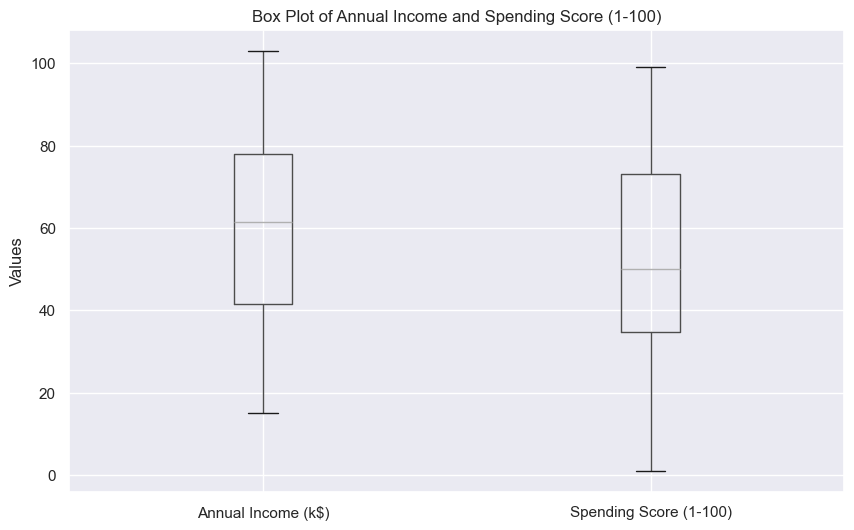

In [13]:
# Creating a box plot
plt.figure(figsize=(10, 6))
df.boxplot(column=['Annual Income (k$)', 'Spending Score (1-100)'])
plt.title('Box Plot of Annual Income and Spending Score (1-100)')
plt.ylabel('Values')
plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler
# Standardize features (important for DBSCAN)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


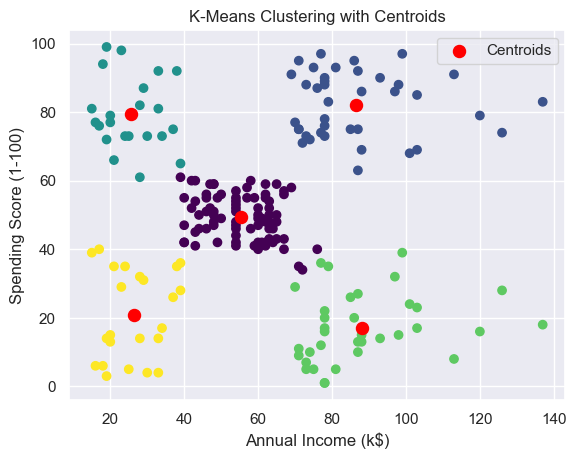

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42,init='k-means++')
df['Cluster'] = kmeans.fit_predict(X)

# Get centroids
centroids = kmeans.cluster_centers_

# Plotting the clusters along with centroids
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='.', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.show()


In [17]:
dfc=df
dfc

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40
...,...,...,...,...,...
195,196,Female,35,103.0,79
196,197,Female,45,103.0,28
197,198,Male,32,103.0,74
198,199,Male,32,103.0,18


In [18]:
dfc["cluster"]=y_pred
dfc

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15.0,39,3
1,2,Male,21,15.0,81,2
2,3,Female,20,16.0,6,3
3,4,Female,23,16.0,77,2
4,5,Female,31,17.0,40,3
...,...,...,...,...,...,...
195,196,Female,35,103.0,79,0
196,197,Female,45,103.0,28,4
197,198,Male,32,103.0,74,0
198,199,Male,32,103.0,18,4


In [44]:
# Group by 'Category' and calculate the sum of 'Value'
grouped = df.groupby(['cluster'])[['Annual Income (k$)','Spending Score (1-100)','Age']].mean().round(0)

print(grouped)

         Annual Income (k$)  Spending Score (1-100)   Age
cluster                                                  
0                      84.0                    82.0  33.0
1                      79.0                    17.0  40.0
2                      48.0                    56.0  39.0
3                      26.0                    21.0  45.0
4                     101.0                    22.0  41.0


# hierarchy clustering

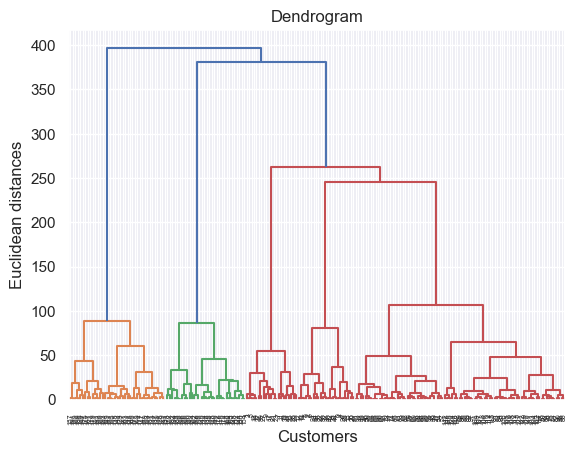

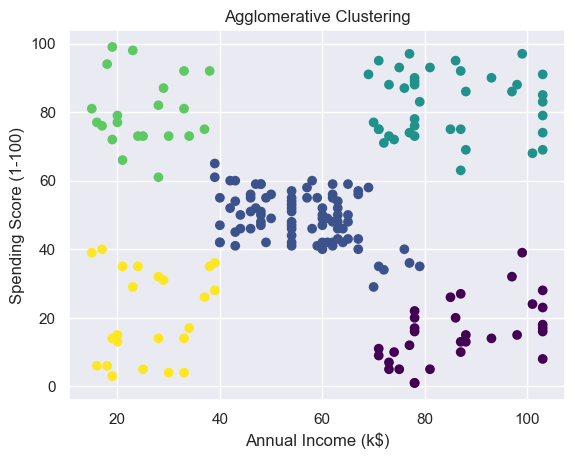

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                15.0                      39   
1             2    Male   21                15.0                      81   
2             3  Female   20                16.0                       6   
3             4  Female   23                16.0                      77   
4             5  Female   31                17.0                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35               103.0                      79   
196         197  Female   45               103.0                      28   
197         198    Male   32               103.0                      74   
198         199    Male   32               103.0                      18   
199         200    Male   30               103.0                      83   

     cluster  Cluster  
0          4        4  
1          3        3  
2          4   

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch



# Select features for clustering
XX= df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Create a dendrogram
dendrogram = sch.dendrogram(sch.linkage(XX, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Apply Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['Cluster'] = agg_clust.fit_predict(X)

# Plotting the clusters
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Agglomerative Clustering')
plt.show()

print(df)


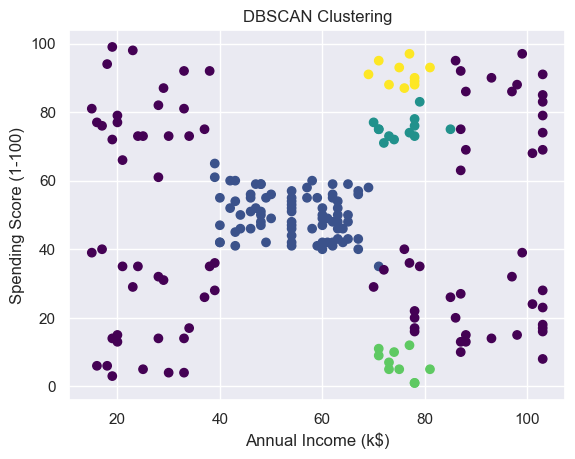

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                15.0                      39   
1           2    Male   21                15.0                      81   
2           3  Female   20                16.0                       6   
3           4  Female   23                16.0                      77   
4           5  Female   31                17.0                      40   

   cluster  
0        3  
1        2  
2        3  
3        2  
4        3  


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler




# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
q= dbscan.fit_predict(X_scaled)

# Plotting the clusters
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=q, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.show()

print(df.head())
